Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import spearmanr

Visualize missing values

นำเข้าข้อมูล
1. data_residental_project คือข้อมูลรายละเอียดโครงการที่อยู่อาศัยประเภทจัดสรร ผู้พัฒนา พื้นที่โครงการและสิ่งอำนวนความสะดวกของประเทศไทย 
                               จากการรวบรวมโดย Baania (Thailand)
2. data_residental_unittype คือข้อมูลรายละเอียดแบบบ้านในโครงการที่อยู่อาศัยประเภท จัดสรร จากการรวบรวมโดย Baania (Thailand)
3. data_city_train_station คือข้อมูลสถานีรถไฟฟ้า ทั้งที่เปิดใช้บริการแล้ว และอยู่ในขั้นตอนของแผนการพัฒนา

In [2]:
dataset_1 = pd.read_csv('D:/My_IS/Data/for_project/data_residental_project.csv')
dataset_2 = pd.read_csv('D:/My_IS/Data/for_project/data_residental_unittype.csv')
dataset_3 = pd.read_csv('D:/My_IS/Data/for_project/data_city_train_station.csv')

In [3]:
dataset_1.head()

,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,5644.0,project_12591,Supalai Ville Sukhumvit-Srinakarin,ศุภาลัย วิลล์ สุขุมวิท-ศรีนครินทร์,3,Townhome,ทาวน์โฮม,1840000.0,developer_97,Supalai Public Company Limited,...,NaN,1.0,1.0,1.0,1.0,2017-12-15 14:39:29,2009-12-31 07:00:00,2020-12-04 10:44:32,baania,https://baania.com/th/project/ศุภาลัย-วิลล์-สุ...
1,20584.0,5ebb9b0742ad800019cd1546,Wararom Phetkasem 69,วรารมย์ เพชรเกษม 69,1,Detached House,บ้าน,2555000.0,developer_1158,Quality Houses Public Company Limited,...,NaN,NaN,NaN,NaN,1.0,2020-05-13 14:00:23,NaN,2022-01-07 18:00:10,baania,https://baania.com/th/project/วรารมย์-เพชรเกษม...
2,19570.0,project_5363,Baan Samretvill 1,บ้านสำเร็จวิลล์ 1,3,Townhome,ทาวน์โฮม,1100000.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-03-28 10:25:41,1970-01-02 07:00:00,2020-12-04 10:38:03,baania,https://baania.com/th/project/บ้านสำเร็จวิลล์-...
3,7940.0,project_8210,Baan Thip Net,บ้านทิพย์เนตร,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2017-07-04 08:38:26,1970-01-02 07:00:00,2020-12-04 10:38:09,baania,https://baania.com/th/project/บ้านทิพย์เนตร-pr...
4,7698.0,5f042c65b285eb00194de2f8,Lapista Villa @Yamu Hills,ลาพิสต้า วิลล่า @ยามู ฮิลล์,1,Detached House,บ้าน,0.0,5f03f07eb285eb00194de183,"Trillion Estates Co., Ltd.",...,NaN,NaN,NaN,NaN,NaN,2020-07-07 15:03:49,NaN,2020-12-04 10:33:27,baania,https://baania.com/th/project/ลาพิสต้า-วิลล่า-...


In [4]:
dataset_2.head()

,row_number,unittype_id,project_id,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,area_total_min_wa,area_usable_min,price_min,...,count_room_guest,count_room_kitchen,count_room_living,count_room_maid,count_room_storage,count_room_utility,date_created,date_updated,source,url_unittype
0,9921,unittype_32703,project_13900,S2,20000,Twin house,บ้านแฝด,NaN,120.0,4900000.0,...,NaN,1.0,1.0,NaN,NaN,NaN,2022-03-28 10:30:04,2022-03-28 10:24:51,baania,https://baania.com/th/project/บ้านสบาย-วิลเลจ-...
1,28994,unittype_9841,project_3367,A1-A5 Tower B Floor 2,2,Condo,คอนโด,NaN,29.0,897000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-12 13:20:52,2020-10-14 00:57:33,baania,https://baania.com/th/project/เดอะ-บรีส-คอนโดม...
2,13506,unittype_29776,project_12433,ทาวน์โฮมสามชั้น,3,Townhome,ทาวน์โฮม,NaN,NaN,2300000.0,...,NaN,1.0,NaN,NaN,NaN,NaN,2020-12-04 10:42:18,2020-10-14 19:17:28,baania,https://baania.com/th/project/นวลผกา-เฟส-1-124...
3,25862,unittype_3695,project_541,บ้านเดี่ยวสองชั้น Type B,1,Detached House,บ้าน,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-04 10:44:15,2020-10-14 21:17:46,baania,https://baania.com/th/project/บ้านพิงค์ดอยเพลส...
4,32096,unittype_16499,project_6518,2 Bedrooms,2,Condo,คอนโด,NaN,66.0,4360000.0,...,NaN,1.0,1.0,NaN,NaN,NaN,2021-11-12 13:21:33,2020-10-14 01:05:31,baania,https://baania.com/th/project/เดอะ-ราฟเฟิล-651...


In [5]:
dataset_3.head()

,row_number,gid,line_no,railway,line_typt,line_type,status,line_th,line_en,station_th,station_en,latitude,longitude,province_name_th,province_name_en,district_name_th,district_name_en,subdistrict_name_th,subdistrict_name_en
0,312,228,8,รถไฟฟ้า,เอ็มอาร์ที,MRT,อนาคต,สายสีส้ม,Orange Line,สนามหลวง,Sanam Luang,13.757770,100.496527,กรุงเทพมหานคร,BANGKOK,พระนคร,PHRA NAKHON,ตลาดยอด,TALAT YOT
1,138,91,3,รถไฟฟ้า,เอ็มอาร์ที,MRT,ปัจจุบัน,สายสีน้ำเงิน,Blue Line,ศูนย์วัฒนธรรมแห่งประเทศไทย,Thailand Cultural Centre,13.764791,100.569130,กรุงเทพมหานคร,BANGKOK,ดินแดง,DIN DAENG,ดินแดง,DIN DAENG
2,46,26,1,รถไฟฟ้า,บีทีเอส,BTS,ปัจจุบัน,สายสุขุมวิท,Sukhumvit Line,พญาไท,Phaya Thai,13.756953,100.533825,กรุงเทพมหานคร,BANGKOK,ราชเทวี,RATCHATHEWI,ทุ่งพญาไท,THUNG PHAYA THAI
3,256,109,3,รถไฟฟ้า,เอ็มอาร์ที,MRT,ปัจจุบัน,สายสีน้ำเงิน,Blue Line,ภาษีเจริญ,Phasi Charoen,13.712866,100.433454,กรุงเทพมหานคร,BANGKOK,บางแค,BANG KHAE,บางแค,BANG KHAE
4,318,30,1,รถไฟฟ้า,บีทีเอส,BTS,ปัจจุบัน,สายสุขุมวิท,Sukhumvit Line,เพลินจิต,Phloen Chit,13.743066,100.548995,กรุงเทพมหานคร,BANGKOK,ปทุมวัน,PATHUM WAN,ลุมพินี,LUMPHINI


นำข้อมูลทั้ง 3 ตารางมารวมกัน

In [6]:
dataset_1_2 = pd.merge(dataset_1, dataset_2,how = 'inner',on ='project_id' ) 

In [7]:
dataset = pd.merge(dataset_1_2, dataset_3,how = 'left', on = 'subdistrict_name_en') 

In [8]:
dataset.shape

(79351, 89)

In [9]:
dataset.columns

Index(['row_number_x', 'project_id', 'name_en', 'name_th_x',
       'propertytype_id_x', 'propertytype_name_en_x', 'propertytype_name_th_x',
       'price_min_x', 'developer_id', 'developer_name_en', 'developer_name_th',
       'latitude_x', 'longitude_x', 'neighborhood_id', 'neighborhood_name_en',
       'neighborhood_name_th', 'subdistrict_id', 'subdistrict_name_en',
       'subdistrict_name_th_x', 'district_id', 'district_name_en_x',
       'district_name_th_x', 'province_id', 'province_name_en_x',
       'province_name_th_x', 'zipcode', 'count_elevator_x',
       'count_elevator_service', 'count_floor', 'count_parking_x',
       'count_tower', 'count_unit', 'count_unittype', 'facility_clubhouse',
       'facility_fitness', 'facility_meeting', 'facility_park',
       'facility_playground', 'facility_pool', 'facility_security',
       'date_created_x', 'date_finish', 'date_updated_x', 'source_x',
       'url_project', 'row_number_y', 'unittype_id', 'name_th_y',
       'propertytype_i

In [10]:
dataset   =      dataset[['project_id', 'name_en','propertytype_id_x', 
                          'propertytype_name_en_x','developer_id', 
                          'developer_name_en','neighborhood_name_en',
                          'subdistrict_name_en','district_name_en_x',
                          'province_name_en_x' , 'zipcode',
                          'count_elevator_service','count_floor',
                          'count_tower', 'count_unit','count_unittype', 
                          'facility_clubhouse','facility_fitness', 
                          'facility_meeting'  , 'facility_park' ,
                          'facility_playground','facility_pool', 
                          'facility_security','date_finish', 'unittype_id',
                          'area_total_min_wa','area_usable_min','price_min_y',
                          'count_airconditioner', 'count_elevator_y', 
                          'count_floor_internal','count_parking_y',
                          'count_room_bath', 'count_room_bed','count_room_dinning',
                          'count_room_guest'  , 'count_room_kitchen',
                          'count_room_living','count_room_maid','count_room_storage',
                          'count_room_utility', 'gid', 'line_no','railway',
                          'line_type', 'status',  'line_en', 
                          'station_en','latitude_y','longitude_y']]

In [11]:
dataset.rename(columns = {'propertytype_id_x':'propertytype_id', 
                          'propertytype_name_en_x':'propertytype_name',
                          'name_en':'name','developer_name_en':'developer_name',
                          'neighborhood_name_en':'neighborhood_name',
                          'subdistrict_name_en':'subdistrict_name',
                          'district_name_en_x':'district_name' ,
                          'province_name_en_x':'province_name',
                          'price_min_y':'sale_price',
                          'count_elevator_y':'count_elevator',
                          'count_parking_y':'count_parking',
                          'station_en':'station','latitude_y':'latitude',
                          'longitude_y':'longitude'}, inplace = True)

In [12]:
dataset.shape

(79351, 50)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79351 entries, 0 to 79350
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   project_id              79351 non-null  object 
 1   name                    79351 non-null  object 
 2   propertytype_id         79351 non-null  object 
 3   propertytype_name       79351 non-null  object 
 4   developer_id            79351 non-null  object 
 5   developer_name          44801 non-null  object 
 6   neighborhood_name       70089 non-null  object 
 7   subdistrict_name        79328 non-null  object 
 8   district_name           79342 non-null  object 
 9   province_name           79342 non-null  object 
 10  zipcode                 79270 non-null  float64
 11  count_elevator_service  5085 non-null   object 
 12  count_floor             27365 non-null  object 
 13  count_tower             0 non-null      object 
 14  count_unit              74806 non-null

In [14]:
dataset['count_elevator_service'] = pd.to_numeric(dataset['count_elevator_service'])
dataset['count_floor'] = pd.to_numeric(dataset['count_floor'])
dataset['count_tower'] = pd.to_numeric(dataset['count_tower'])

In [15]:
dataset.nunique()

project_id                20024
name                      19954
propertytype_id              11
propertytype_name            11
developer_id               3793
developer_name             2300
neighborhood_name           969
subdistrict_name           1053
district_name               297
province_name                72
zipcode                     348
count_elevator_service       11
count_floor                  69
count_tower                   0
count_unit                 1231
count_unittype               36
facility_clubhouse            2
facility_fitness              2
facility_meeting              2
facility_park                 2
facility_playground           2
facility_pool                 2
facility_security             2
date_finish                 623
unittype_id               42733
area_total_min_wa           507
area_usable_min            1776
sale_price                 4265
count_airconditioner         10
count_elevator                0
count_floor_internal          9
count_pa

In [16]:
dataset.duplicated().sum()

0

สำรวจ Missing Value

In [17]:
categorical_data = dataset.select_dtypes(exclude=[np.number])
numerical_data   = dataset.select_dtypes(include=[np.number])

สำรวจ Missing Value Categorical data

In [18]:
missing_values_cat = categorical_data.isnull().sum() / len(categorical_data)
missing_values_cat = missing_values_cat[missing_values_cat > 0]
missing_values_cat.sort_values(inplace=True)
missing_values_cat

district_name        0.000113
province_name        0.000113
subdistrict_name     0.000290
date_finish          0.091568
neighborhood_name    0.116722
developer_name       0.435407
railway              0.517675
line_type            0.517675
status               0.517675
line_en              0.517675
station              0.517675
dtype: float64

In [19]:
#นำข้อมูล missing values มาสร้างเป็น DataFrame
missing_values_cat = pd.DataFrame(missing_values_cat)
missing_values_cat.columns = ['count']
missing_values_cat.index.names = ['Name']
missing_values_cat

,count
Name,
district_name,0.000113
province_name,0.000113
subdistrict_name,0.000290
date_finish,0.091568
neighborhood_name,0.116722
developer_name,0.435407
railway,0.517675
line_type,0.517675
status,0.517675


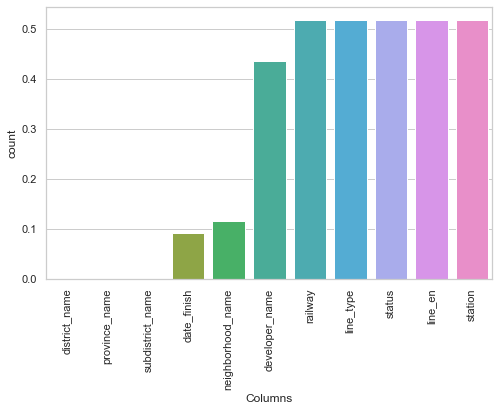

In [20]:
#พล็อตกราฟแท่งแสดง missing values
fig = plt.figure(figsize=(8,5))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = missing_values_cat.index, y = 'count', data=missing_values_cat)
plt.xlabel('Columns')
plt.xticks(rotation = 90)
plt.show()

In [21]:
print(missing_values_cat[missing_values_cat['count']>0.4].index)

Index(['developer_name', 'railway', 'line_type', 'status', 'line_en',
       'station'],
      dtype='object', name='Name')


In [22]:
del_cat_col = ['developer_name', 'railway', 'line_type', 'status', 'line_en',
       'station']
dataset.drop(dataset[del_cat_col],axis=1,inplace=True)

สำรวจ Missing Value Numerical data

In [23]:
missing_values_numer = numerical_data.isnull().sum() / len(numerical_data)
missing_values_numer = missing_values_numer[missing_values_numer > 0]
missing_values_numer.sort_values(inplace=True)
missing_values_numer

zipcode                   0.001021
count_room_bath           0.030560
count_room_bed            0.042936
count_unit                0.057277
area_usable_min           0.117604
sale_price                0.160439
count_unittype            0.177729
facility_security         0.189966
count_floor_internal      0.347607
facility_park             0.389371
facility_pool             0.429320
facility_fitness          0.462754
count_parking             0.488790
line_no                   0.517675
gid                       0.517675
latitude                  0.517675
longitude                 0.517675
count_room_kitchen        0.531688
facility_clubhouse        0.634812
count_floor               0.655140
count_room_dinning        0.684717
facility_playground       0.693400
count_room_guest          0.714937
count_room_living         0.754067
facility_meeting          0.843253
count_room_storage        0.913057
area_total_min_wa         0.926718
count_elevator_service    0.935918
count_room_maid     

In [24]:
#นำข้อมูล missing values มาสร้างเป็น DataFrame
missing_values_numer = pd.DataFrame(missing_values_numer)
missing_values_numer.columns = ['count']
missing_values_numer.index.names = ['Name']
missing_values_numer

,count
Name,
zipcode,0.001021
count_room_bath,0.030560
count_room_bed,0.042936
count_unit,0.057277
area_usable_min,0.117604
sale_price,0.160439
count_unittype,0.177729
facility_security,0.189966
count_floor_internal,0.347607


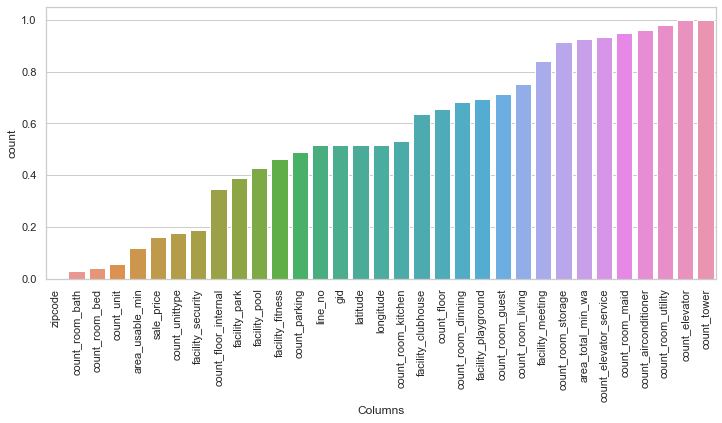

In [25]:
#พล็อตกราฟแท่งแสดง missing values
fig = plt.figure(figsize=(12,5))
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = missing_values_numer.index, y = 'count', data=missing_values_numer)
plt.xlabel('Columns')
plt.xticks(rotation = 90)
plt.show()

ลบ columns ที่มีค่า missing values มากกว่า 60% ของจำนวนแถวข้อมูลออก

In [26]:
print(missing_values_numer[missing_values_numer['count']>0.4].index)

Index(['facility_pool', 'facility_fitness', 'count_parking', 'line_no', 'gid',
       'latitude', 'longitude', 'count_room_kitchen', 'facility_clubhouse',
       'count_floor', 'count_room_dinning', 'facility_playground',
       'count_room_guest', 'count_room_living', 'facility_meeting',
       'count_room_storage', 'area_total_min_wa', 'count_elevator_service',
       'count_room_maid', 'count_airconditioner', 'count_room_utility',
       'count_elevator', 'count_tower'],
      dtype='object', name='Name')


In [27]:
del_numer_col = ['facility_pool', 'facility_fitness', 'count_parking', 'line_no', 'gid',
       'latitude', 'longitude', 'count_room_kitchen', 'facility_clubhouse',
       'count_floor', 'count_room_dinning', 'facility_playground',
       'count_room_guest', 'count_room_living', 'facility_meeting',
       'count_room_storage', 'area_total_min_wa', 'count_elevator_service',
       'count_room_maid', 'count_airconditioner', 'count_room_utility',
       'count_elevator', 'count_tower']
dataset.drop(dataset[del_numer_col],axis=1,inplace=True)

เนื่องจากข้อมูลที่ตั้งเป็นข้อมูลที่ค่อนข้างส่งผลต่อราคาบ้าน เราจะทำการ drop ข้อมูล rows ที่ไม่มีข้อมูลใน columns 

'subdistrict_name_en', 'district_name_en', 'province_name_en', 'zipcode'

In [28]:
location_col = ['subdistrict_name', 'district_name', 'province_name', 'zipcode']
for i in location_col:
    dataset.drop(dataset[dataset[i].isnull() == True].index,inplace=True)

แทนค่า mean ใน columns ที่เป็น numeric data

In [29]:
col_fill_numeric = ['count_unit', 'count_unittype', 'facility_park',
       'facility_security', 'area_usable_min', 'sale_price',
       'count_floor_internal', 'count_room_bath', 'count_room_bed']             
for i in col_fill_numeric:
    dataset[i] = dataset[i].fillna(dataset[i].mean())

columns 'date_finish' จะทำการคำนวณให้ได้จำนวนปีที่สร้างมาใส่ใน columns ใหม่ชื่อว่า 'year_num' แล้วแทนค่า missing ด้วยค่าเฉลี่ย

In [30]:
from datetime import datetime

In [31]:
dataset['date_finish'] = pd.to_datetime(dataset['date_finish'])

In [32]:
current_year = datetime.now().year 
house_year = dataset['date_finish'].dt.year

In [33]:
dataset['year_num'] = current_year - house_year

In [34]:
dataset['year_num'].head()

0    13.0
1    13.0
2    13.0
3    13.0
4    13.0
Name: year_num, dtype: float64

In [35]:
dataset['year_num'] = dataset['year_num'].fillna(dataset['year_num'].mean())

In [36]:
dataset.drop(dataset[['date_finish']],axis=1,inplace=True)

แทนค่า meode ใน columns ที่เป็น category data

In [37]:
categorical_data.columns

Index(['project_id', 'name', 'propertytype_id', 'propertytype_name',
       'developer_id', 'developer_name', 'neighborhood_name',
       'subdistrict_name', 'district_name', 'province_name', 'date_finish',
       'unittype_id', 'railway', 'line_type', 'status', 'line_en', 'station'],
      dtype='object')

In [38]:
def clean(text):
    return text.lower().strip().replace(" ","_")

In [39]:
col_fill_category =['project_id', 'name', 'propertytype_id', 'propertytype_name',
       'developer_id', 'neighborhood_name','unittype_id']
for i in col_fill_category:
    dataset[i] = dataset[i].astype(str).apply(clean) 
    dataset[i] = dataset[i].fillna(dataset[i].mode().astype(str))

In [40]:
dataset.isnull().sum().value_counts()

0    21
dtype: int64

In [41]:
propertytype_name = dataset["propertytype_name"].astype(str)
propertytype_name = propertytype_name.apply(clean)

In [42]:
dataset["propertytype_name"] = propertytype_name

In [43]:
cols_to_check = ['propertytype_name']
for i, col in enumerate(cols_to_check):
    print(dataset.groupby(col)[cols_to_check[i]].count())
    print('--------------')


propertytype_name
apartment                 57
commercial              3645
condo                  27290
detached_house         25443
home_office              903
hotel                     65
land                      86
office_space              25
townhome               15765
twin_house              5965
warehouse_/_factory       12
Name: propertytype_name, dtype: int64
--------------


In [44]:
dataset = dataset[(dataset["propertytype_name"]=="condo" )|
                  (dataset["propertytype_name"]=="detached_house")|
                  (dataset["propertytype_name"]=="townhome")|
                  (dataset["propertytype_name"]=="twin_house")]

In [45]:
cols_to_check = ['propertytype_name']
for i, col in enumerate(cols_to_check):
    print(dataset.groupby(col)[cols_to_check[i]].count())
    print('--------------')

propertytype_name
condo             27290
detached_house    25443
townhome          15765
twin_house         5965
Name: propertytype_name, dtype: int64
--------------


In [46]:
dataset.shape

(74463, 21)

In [47]:
dataset.head()

,project_id,name,propertytype_id,propertytype_name,developer_id,neighborhood_name,subdistrict_name,district_name,province_name,zipcode,...,count_unittype,facility_park,facility_security,unittype_id,area_usable_min,sale_price,count_floor_internal,count_room_bath,count_room_bed,year_num
0,project_12591,supalai_ville_sukhumvit-srinakarin,3,townhome,developer_97,dan_samrong,SAMRONG NUEA,MUEANG SAMUT PRAKAN,Samut Prakan,10270.0,...,3.0,1.0,1.0,unittype_29995,135.0,3350000.0,3.0,3.0,3.0,13.0
1,project_12591,supalai_ville_sukhumvit-srinakarin,3,townhome,developer_97,dan_samrong,SAMRONG NUEA,MUEANG SAMUT PRAKAN,Samut Prakan,10270.0,...,3.0,1.0,1.0,unittype_29993,146.0,4641000.0,2.0,3.0,4.0,13.0
2,project_12591,supalai_ville_sukhumvit-srinakarin,3,townhome,developer_97,dan_samrong,SAMRONG NUEA,MUEANG SAMUT PRAKAN,Samut Prakan,10270.0,...,3.0,1.0,1.0,unittype_29994,89.0,1840000.0,2.0,3.0,3.0,13.0
3,project_12591,supalai_ville_sukhumvit-srinakarin,1,detached_house,developer_97,dan_samrong,SAMRONG NUEA,MUEANG SAMUT PRAKAN,Samut Prakan,10270.0,...,3.0,1.0,1.0,unittype_29995,135.0,3350000.0,3.0,3.0,3.0,13.0
4,project_12591,supalai_ville_sukhumvit-srinakarin,1,detached_house,developer_97,dan_samrong,SAMRONG NUEA,MUEANG SAMUT PRAKAN,Samut Prakan,10270.0,...,3.0,1.0,1.0,unittype_29993,146.0,4641000.0,2.0,3.0,4.0,13.0



สำรวจค่าผิดปกติ (Outliers)

พล็อตข้อมูลในคอลัมน์ sale_price โดยใช้ฟังก์ชัน boxplot ของ seaborn

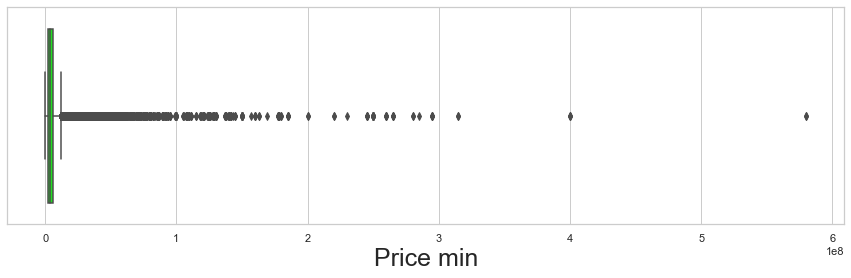

In [48]:
fig = plt.figure(figsize=(15,4))
sns.boxplot(x=dataset['sale_price'], color='lime')
plt.xlabel('Price min', fontsize=25)
plt.show()

ในคอลัมน์ sale_price ของข้อมูลตัวอย่างมี Outlier อยู่ ทำการคำนวณ IQR

In [49]:
Q1 = dataset['sale_price'].quantile(0.25)
Q3 = dataset['sale_price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

4044689.585332131


คำนวณ Lower Fence และ Upper Fence

In [50]:
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)
print('Lower Fence: ', lower_fence)
print('Upper Fence: ', upper_fence)

Lower Fence:  -3877034.3779981965
Upper Fence:  12301723.963330328


ตรวจสอบข้อมูลที่มีคอลัมน์ Age ต่ำกว่า Lower Fence และสูงกว่า Upper Fence

In [51]:
dataset[((dataset['sale_price'] < lower_fence) |(dataset['sale_price'] > upper_fence))].sale_price.sort_values()

21154     12323000.0
28641     12360000.0
48729     12390000.0
62846     12390000.0
62845     12390000.0
            ...     
75923    400000000.0
75925    400000000.0
75924    400000000.0
45508    580000000.0
45509    580000000.0
Name: sale_price, Length: 6138, dtype: float64

นำเอา Outliers ออกไปจาก DataFrame

In [52]:
df_no_outlier = dataset[~((dataset['sale_price'] < lower_fence)|(dataset['sale_price'] > upper_fence))]

In [53]:
df_no_outlier.sale_price.describe()

count    6.832500e+04
mean     4.050524e+06
std      2.410929e+06
min      1.000000e+05
25%      2.001000e+06
50%      3.500000e+06
75%      6.234690e+06
max      1.230000e+07
Name: sale_price, dtype: float64

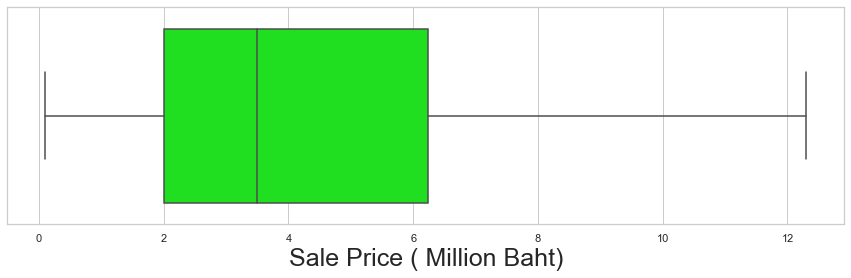

In [54]:
fig = plt.figure(figsize=(15,4))
sns.boxplot(x=df_no_outlier['sale_price']/1000000, color='lime')
plt.xlabel('Sale Price ( Million Baht)', fontsize=25)
plt.show()

สำรวจการกระจายของข้อมูล

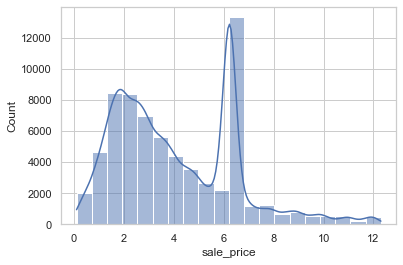

In [55]:
sns.histplot(df_no_outlier.sale_price/1000000, kde=True,bins=20)
plt.show()

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
print(df_no_outlier.select_dtypes(exclude=[np.number]).columns)

Index(['project_id', 'name', 'propertytype_id', 'propertytype_name',
       'developer_id', 'neighborhood_name', 'subdistrict_name',
       'district_name', 'province_name', 'unittype_id'],
      dtype='object')


In [58]:
df_no_outlier.loc[:,df_no_outlier.dtypes == 'object'] = (df_no_outlier.select_dtypes(['object']).astype(str))

c:\Users\Admin\.conda\envs\myenv\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


In [59]:
lebel = LabelEncoder()
col_to_label = ['project_id', 'name', 'propertytype_id', 'propertytype_name',
                'developer_id', 'neighborhood_name', 'subdistrict_name',
                'district_name', 'province_name', 'unittype_id']
for i in col_to_label:
    df_no_outlier[i] = lebel.fit_transform(df_no_outlier[i])

c:\Users\Admin\.conda\envs\myenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
df_no_outlier.head()

,project_id,name,propertytype_id,propertytype_name,developer_id,neighborhood_name,subdistrict_name,district_name,province_name,zipcode,...,count_unittype,facility_park,facility_security,unittype_id,area_usable_min,sale_price,count_floor_internal,count_room_bath,count_room_bed,year_num
0,6166,14906,3,2,3435,204,819,162,54,10270.0,...,3.0,1.0,1.0,24911,135.0,3350000.0,3.0,3.0,3.0,13.0
1,6166,14906,3,2,3435,204,819,162,54,10270.0,...,3.0,1.0,1.0,24909,146.0,4641000.0,2.0,3.0,4.0,13.0
2,6166,14906,3,2,3435,204,819,162,54,10270.0,...,3.0,1.0,1.0,24910,89.0,1840000.0,2.0,3.0,3.0,13.0
3,6166,14906,0,1,3435,204,819,162,54,10270.0,...,3.0,1.0,1.0,24911,135.0,3350000.0,3.0,3.0,3.0,13.0
4,6166,14906,0,1,3435,204,819,162,54,10270.0,...,3.0,1.0,1.0,24909,146.0,4641000.0,2.0,3.0,4.0,13.0


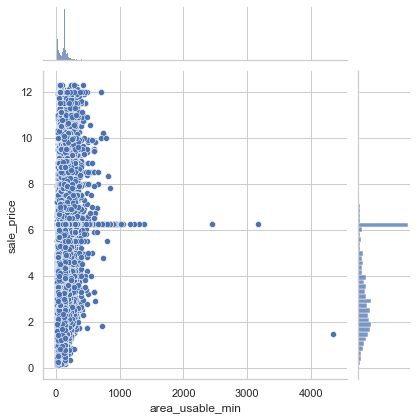

In [61]:
sns.jointplot(x = df_no_outlier['area_usable_min'], y = df_no_outlier['sale_price']/1000000)

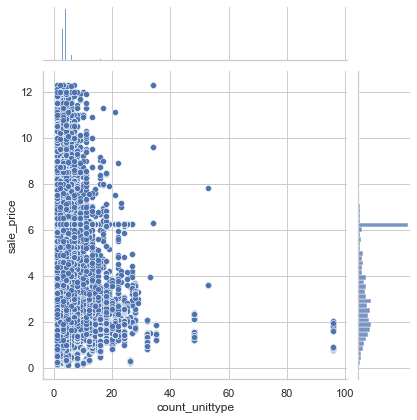

In [62]:
sns.jointplot(x=df_no_outlier['count_unittype'], y=df_no_outlier['sale_price']/1000000)

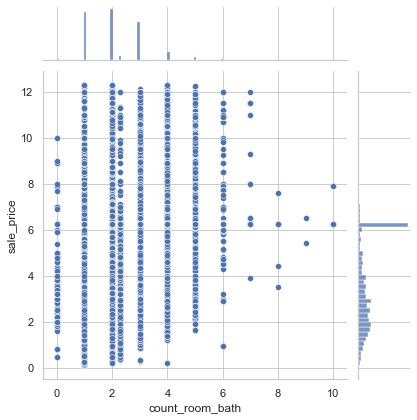

In [63]:
sns.jointplot(x=df_no_outlier['count_room_bath'], y=df_no_outlier['sale_price']/1000000)

หาค่า Correlation Score และพล็อต Correlation Heatmap โดยใช้ Seaborn Library

In [64]:
corr = df_no_outlier.corr()
corr.shape

(21, 21)

<AxesSubplot:>

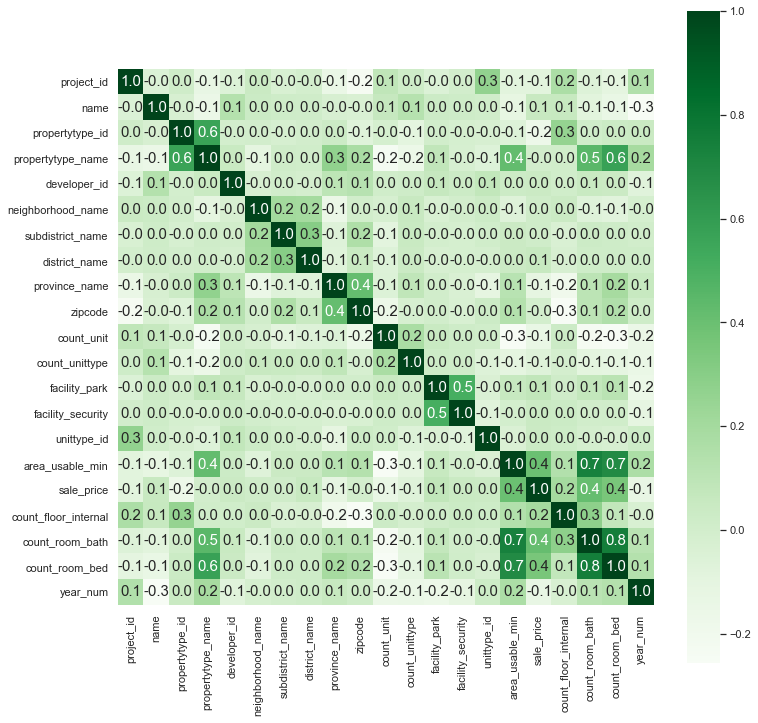

In [65]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [66]:
print (corr['sale_price'].sort_values(ascending=False)[:10]) #top 10 correlations
print (corr['sale_price'].sort_values(ascending=False)[-5:]) #least 5 correlations

sale_price              1.000000
count_room_bath         0.412447
area_usable_min         0.400295
count_room_bed          0.356825
count_floor_internal    0.196063
facility_park           0.082549
district_name           0.059425
name                    0.056919
facility_security       0.043527
unittype_id             0.042330
Name: sale_price, dtype: float64
project_id        -0.084831
province_name     -0.105819
year_num          -0.126101
count_unit        -0.134168
propertytype_id   -0.164250
Name: sale_price, dtype: float64


In [67]:
# Spliting target variable and independent variables
X = df_no_outlier.drop(['sale_price'], axis = 1)
y = df_no_outlier['sale_price']

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 4)

Linear regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [71]:
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [72]:
# Model Evaluation
from sklearn import metrics
print('MAPE:','%.2f' %MAPE(y_train, y_pred),'%')
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAPE: 62.50 %
R^2: 0.32164823385021524
Adjusted R^2: 0.3213833665017518
MAE: 1572703.408709415
MSE: 3928251118931.1626
RMSE: 1981981.6141758638


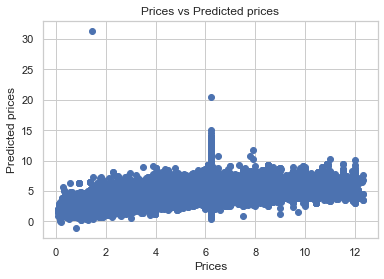

In [73]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train/1000000, y_pred/1000000)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

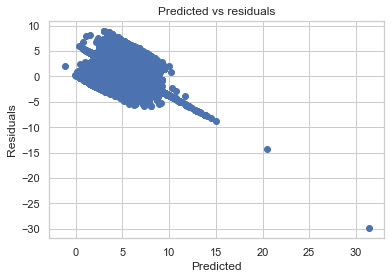

In [74]:
# Checking residuals
plt.scatter(y_pred/1000000,(y_train-y_pred)/1000000)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [75]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [76]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
mape_linreg = MAPE(y_test, y_test_pred)
print('MAPE:','%.2f' %mape_linreg,'%')
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAPE: 63.63 %
R^2: 0.32400993176478554
Adjusted R^2: 0.32321749278906875
MAE: 1584550.8858794353
MSE: 3972999977078.6484
RMSE: 1993238.5650189111


Random Forest Regressor

In [77]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [79]:
# Model Evaluation
print('MAPE:','%.2f' %MAPE(y_train, y_pred),'%')
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAPE: 7.86 %
R^2: 0.973482939413905
Adjusted R^2: 0.9734725856360025
MAE: 228854.52056321106
MSE: 153557015867.03433
RMSE: 391863.51688698237


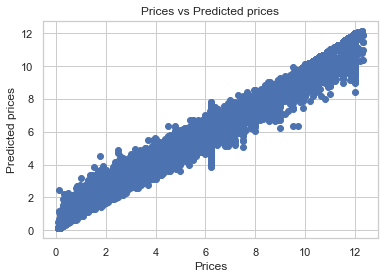

In [80]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train/1000000, y_pred/1000000)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

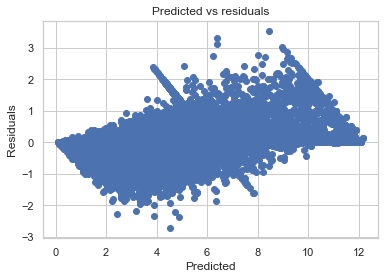

In [81]:
# Checking residuals
plt.scatter(y_pred/1000000,(y_train-y_pred)/1000000)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [82]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [83]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
mape_rf = MAPE(y_test, y_test_pred)
print('MAPE:','%.2f' %mape_rf,'%')
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAPE: 20.72 %
R^2: 0.8163984941343907
Adjusted R^2: 0.8161832646567919
MAE: 612882.7822196528
MSE: 1079082094356.8292
RMSE: 1038788.7631067393


XGBoost Regressor

In [84]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [85]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [86]:
# Model Evaluation
print('MAPE:','%.2f' %MAPE(y_train, y_pred),'%')
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAPE: 26.95 %
R^2: 0.7930313400304573
Adjusted R^2: 0.7929505276217386
MAE: 793226.7346145895
MSE: 1198529893603.1929
RMSE: 1094773.9006768442


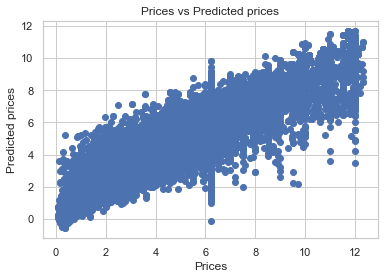

In [87]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train/1000000, y_pred/1000000)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

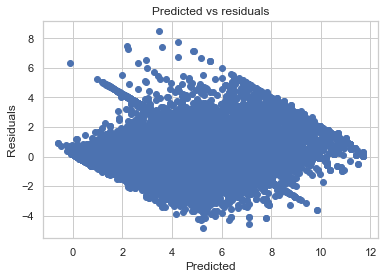

In [88]:
# Checking residuals
plt.scatter(y_pred/1000000,(y_train-y_pred)/1000000)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [89]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [90]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
mape_xgb = MAPE(y_test, y_test_pred)
print('MAPE:','%.2f' %mape_xgb,'%')
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAPE: 29.71 %
R^2: 0.7391941077035997
Adjusted R^2: 0.7388883742855159
MAE: 890624.921150633
MSE: 1532835840060.049
RMSE: 1238077.477406018


Evaluation and comparision of all the models

In [91]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg, acc_rf, acc_xgb],
    'Mean absolute percentage error': ['%.2f' %mape_linreg, '%.2f' %mape_rf, '%.2f' %mape_xgb]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score,Mean absolute percentage error
1,Random Forest,0.816398,20.72
2,XGBoost,0.739194,29.71
0,Linear Regression,0.324010,63.63
